In [5]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#initializing instagram on our webdriver
service = Service(executable_path = './chromedriver.exe')
driver = webdriver.Chrome(service=service)
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver, 10)

In [9]:
#getting the element of input box for input mail and sending the mail id
input_email = driver.find_element(By.NAME , 'username')
input_email.send_keys('USERNAME')

#getting the element of input box for input password and sending the password
input_password = driver.find_element(By.NAME, 'password')
input_password.send_keys('PASSWORD')

#getting the element of login button and clicking it
login_button = driver.find_element(By.XPATH, '//button[@class = "_acan _acap _acas _aj1-"]')
login_button.submit()
time.sleep(5)

#clicking on the option of not now to save the login info
save_login_info_not_now = wait.until(EC.visibility_of_element_located((By.XPATH, '//div[@class = "x1i10hfl xjqpnuy xa49m3k xqeqjp1 x2hbi6w xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1q0g3np x1lku1pv x1a2a7pz x6s0dn4 xjyslct x1ejq31n xd10rxx x1sy0etr x17r0tee x9f619 x1ypdohk x1i0vuye x1f6kntn xwhw2v2 xl56j7k x17ydfre x2b8uid xlyipyv x87ps6o x14atkfc xcdnw81 xjbqb8w xm3z3ea x1x8b98j x131883w x16mih1h x972fbf xcfux6l x1qhh985 xm0m39n xt0psk2 xt7dq6l xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 x1n5bzlp x173jzuc x1yc6y37"]')))
save_login_info_not_now.click()  

#clicking on the option not now for notifications
notification = wait.until(EC.visibility_of_element_located((By.XPATH, '//button[@class = "_a9-- _a9_1"]')))
notification.click()

In [27]:
def search(text):
    
    #finding search section and sending text
    search_icon = driver.find_element(By.XPATH, '//input[@class = "x1lugfcp x19g9edo x1lq5wgf xgqcy7u x30kzoy x9jhf4c x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x5n08af xl565be x5yr21d x1a2a7pz xyqdw3p x1pi30zi xg8j3zb x1swvt13 x1yc453h xh8yej3 xhtitgo xs3hnx8 x1dbmdqj xoy4bel x7xwk5j"]')
    search_icon.send_keys(text)
    time.sleep(5)
        
    #extracting all serched handle
    search_results = driver.find_elements(By.XPATH, '//div[@class = "x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xocp1fn"]//a')
    names = []
    time.sleep(5)
    
    #extracting username
    for i in search_results :
        if i.text.split('\n')[0] != '#' :
            names.append(i.text.split('\n')[0])             
    time.sleep(5)
        
    #clearing search bar
    driver.find_element(By.XPATH, '//div[@class = "_aawn _9-lv"]').click()
 
    return names
    

In [28]:
names = search('food')

In [29]:
profile_names = []

for name in names[:10]:
    profile_names.append(name)

In [30]:
print(profile_names)

['dilsefoodie', 'tinta_fooddiaries', 'foodtales.vijayawada', 'food.captain_', 'villagefoodkingdom', 'food.of.chennai', 'food', 'foodtalkintown', 'hyderabadfoodich', 'food_chichas']


In [90]:
profile_names = ['dilsefoodie', 'tinta_fooddiaries', 'foodtales.vijayawada', 'food.captain_', 'villagefoodkingdom', 'food.of.chennai', 'food', 'foodtalkintown', 'hyderabadfoodich', 'food_chichas']

In [74]:
def open_profile(profile_name):
    #searching for the profile
    search_icon = wait.until(EC.visibility_of_element_located((By.XPATH, '//input[@class = "x1lugfcp x19g9edo x1lq5wgf xgqcy7u x30kzoy x9jhf4c x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x5n08af xl565be x5yr21d x1a2a7pz xyqdw3p x1pi30zi xg8j3zb x1swvt13 x1yc453h xh8yej3 xhtitgo xs3hnx8 x1dbmdqj xoy4bel x7xwk5j"]')))
    search_icon.send_keys(profile_name)
    time.sleep(4)
    
    profile = driver.find_element(By.XPATH, '//a[@class = "x1i10hfl x1qjc9v5 xjbqb8w xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1q0g3np x87ps6o x1lku1pv x1a2a7pz x1dm5mii x16mil14 xiojian x1yutycm x1lliihq x193iq5w xh8yej3"]')
    profile.click()
    
    return

In [18]:
def home():
    home_button = driver.find_element(By.XPATH, '//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd"]')
    home_button.click()
    return

1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
        I. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10     handles and find the top 5 which have the highest number of followers
    II. Now Find the number of posts these handles have done in the previous 3 days.
    III. Depict this information using a suitable graph.

In [91]:
def profiles(profile_names):
    
    dic = {}
    #opening profile
    for profile in profile_names:
        open_profile(profile)
        time.sleep(3)
        
        followers = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class = "_ac2a _ac2b"]')))[1]
        #replacing ',' with '' and converted into int
        dic[profile] = int(followers.get_attribute('title').replace(',' , ''))
        home()
        time.sleep(3)
        
    count = 0
    res = OrderedDict()
    for i in sorted(dic, key= dic.get , reverse = True):
        res[i] = dic[i]
        count+=1
        if count>=5:
            break
            
    return res

In [92]:
profiles_with_most_flwrs = profiles(profile_names)

In [62]:
#top 5 profiles with most followers
for i in profiles_with_most_flwrs:
    print(i, "with", profiles_with_most_flwrs[i], 'followers')

dilsefoodie with 1156850 followers
food with 1156850 followers
food_chichas with 221568 followers
food.of.chennai with 124856 followers
tinta_fooddiaries with 94496 followers


II. Now Find the number of posts these handles have done in the previous 3 days.

In [93]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    #locating first post
    post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
    driver.execute_script('window.scrollBy(0,300)')
    post.click()
        
    count = 0 
    while True :
        #getting date of the the post
        temp = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class = "_aaqe"]')))
        #getting date in string format
        date_string = temp.get_attribute('datetime')
        #converting into date format
        date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
        #taking differnce between today's date and post posted date
        if (datetime.now() - date).days > day :
            break
        else :
            count += 1
        #locating next button
        if count == 1:
            next_button = wait.until(EC.visibility_of_element_located((By.XPATH, '//button[@class = "_abl-"]')))
            next_button.click()
        else:
            next_button = driver.find_elements(By.XPATH, '//button[@class = "_abl-"]')
            time.sleep(2)
            next_button[1].click()
        #closing the post
    close=driver.find_element(By.XPATH, '//div[@class = "x160vmok x10l6tqk x1eu8d0j x1vjfegm"]')
    close.click()
    return count

In [94]:
total_post_count = {}
for i in profiles_with_most_flwrs :
    home()
    time.sleep(3)
    open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count

In [89]:
#no of posts in past three days

for i in total_post_count:
    print(i, "has posted", total_post_count[i], "posts in past three days")

dilsefoodie has posted 2 posts in past three days
food has posted 2 posts in past three days
food_chichas has posted 0 posts in past three days
food.of.chennai has posted 0 posts in past three days
tinta_fooddiaries has posted 4 posts in past three days


III. Depict this information using a suitable graph

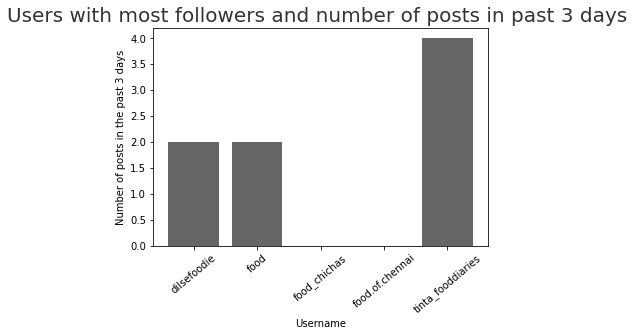

In [96]:
#graph depicting the posts by accounts
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='black',alpha=0.6)
plt.ylabel("Number of posts in the past 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Users with most followers and number of posts in past 3 days ',fontsize=20, color='black',alpha=0.8)
plt.xticks(rotation = 40)
plt.show()

2. Your friend also needs a list of hashtags that he should use in his posts.
    I. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    II. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    III. Create a csv file with two columns : the word and its frequency
    IV. Now, find the hashtags that were most popular among these bloggers
    V. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [116]:
def hashtags(profiles):
    hashtags_list= []
    for user in profiles:
            #this is to make sure that we start from home
            home()
            time.sleep(2)
            #this function elps us in opening the userprofile
            open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 400);')
            time.sleep(2)
            #locating the post of the user
            post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
            post.click()
            time.sleep(3)
            count = 0
            while count< 10:
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH, '//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd"]')
                time.sleep(3)
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text[1:])
                count+=1
                if count == 1:
                    next_button = wait.until(EC.visibility_of_element_located((By.XPATH, '//button[@class = "_abl-"]')))
                    next_button.click()
                else:
                    next_button = driver.find_elements(By.XPATH, '//button[@class = "_abl-"]')
                    time.sleep(2)
                    next_button[1].click()
                
            #locating close button and clicking on it
            close=driver.find_element(By.XPATH, '//div[@class = "x160vmok x10l6tqk x1eu8d0j x1vjfegm"]')
            time.sleep(3)
            close.click()
    return hashtags_list
    

In [117]:
profiles = list(total_post_count.keys())
hashtags = hashtags(profiles)

In [120]:
for hashtag in hashtags:
    print(hashtag)

dilsefoodie
food
chicken
leg
airfryer
recipe
dilsefoodie
food
fish
surmaifish
egg
appam
dilsefoodie
katlambe
food
streetfood
veg
dehradun
dilsefoodie
food
breakfast
streetfood
poori
nagorihalwa
dilsefoodie
dilsecouple
kheer
meetha
food
westdelhi
Ad
dilsefoodie
Omsweets
food
cholebhature
sohnaroad
gurgaon
sohnahighway
dilsefoodie
meat
nonvegfoodie
foodfood
streetfood
desighee
ashokmeat
sadigaddi
dilsefoodie
amritsarikulche
indian
food
delhifoodvlogger
chandrayan3
dilsefoodie
food
streetfood
chaat
dilsefoodie
dilsecouple
rakhi
hamper
rakhihampers
bornoninstagram
jewellery
gold
diamond
antique
silver
templejewellery
exhibition
shopping
lifestyle
lifestyleblogger
lifestylevlogger
vijayawada
reels
reelsinstagram
reelitfeelit
reelsvideo
reelsindia
reelvideo
trendingreels
trending
trendingsongs
trendingnow
explorepage
explore
bornoninstagram
rakshabandhan
dessert
cake
cakedesign
cupcakes
tresleches
chocolate
cakelover
foodvideos
vijayawada
food
foodie
foodporn
foodblogger
reels
reelsinstagram

II. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [122]:
dct = {}
hashatgs_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    hashatgs_list.append([i,dct[i]])
    print(i,dct[i])

food 20
foodporn 18
chennaifoodblogger 17
foodie 15
annanagarfoodie 15
trending 12
foodblogger 12
reels 11
trendingreels 11
foodlover 11
dilsefoodie 10
bornoninstagram 10
vijayawada 10
reelsinstagram 10
explorepage 10
explore 10
foodreels 10
tinta_fooddiaries 10
reelitfeelit 9
reelsvideo 9
reelsindia 9
trendingsongs 9
trendingnow 9
foodlovers 9
foodies 9
reelvideo 8
instafood 8
telugucinema 8
foodstagram 8
nonveglover 8
telugu 7
hyderabad 7
instafoodblogger 7
streetfood 6
telugumovie 6
chennaifoodie 6
instafoodie 6
yummy 6
foodpost 6
foodvideo 6
chicken 5
feelitreelit 5
trendingmusic 5
biryani 5
telugusongs 5
instainfluencer 5
foodoftheday 5
lifestyle 4
foodinstagram 4
reelkarofeelkaro 4
reelinstagram 4
reelsviral 4
teluguactress 4
chennai 4
andhra 4
foodchichas 4
walkwithchennai 4
annanagarfoodblogger 4
walkwithindia 4
chennaifood 4
foodgasm 4
foodlife 4
keralafood 4
fish 3
shopping 3
lifestyleblogger 3
lifestylevlogger 3
tandoori 3
nonveg 3
mutton 3
telugutrolls 3
telangana 3
healthy

III. Create a csv file with two columns : the word and its frequency

In [123]:
df = pd.DataFrame(hashatgs_list,columns=['Hashtags','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('hashtags_frequency.csv',index=False)
df.head()

,Hashtags,Frequency
0,food,20
1,foodporn,18
2,chennaifoodblogger,17
3,foodie,15
4,annanagarfoodie,15


IV. Now, find the hashtags that were most popular among these bloggers

In [125]:
#the top 10 hashtags are
for hashtag in hashatgs_list[:10]:
    print(hashtag[0],':',hashtag[1])

food : 20
foodporn : 18
chennaifoodblogger : 17
foodie : 15
annanagarfoodie : 15
trending : 12
foodblogger : 12
reels : 11
trendingreels : 11
foodlover : 11


V. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

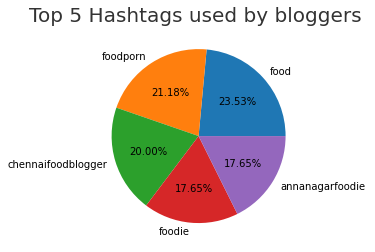

In [136]:
#pie chart for top 5 hashtags
hashtags = []
frequencies = []
for i in range(5):
    hashtags.append(hashatgs_list[i][0])
    frequencies.append(hashatgs_list[i][1])
    
plt.pie(frequencies,labels =hashtags,autopct='%0.2f%%',radius=1)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='black',alpha=0.8)
plt.show()

3. You need to also calculate average followers : likes ratio for the obtained handles.
    I. Followers : Likes ratio is calculated as follows:
    II. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    III. Calculate the average likes for a handle.
    IV. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
    V. Create a bar graph to depict the above obtained information.

In [75]:
def profile_post_likes(profile):
    
    #list for likes
    likes_list= []
    
    #This fuction will search a user and open that profile
    open_profile(profile)
    time.sleep(4)
    #just for scrolling to getting post
    driver.execute_script('window.scrollTo(0, 400);')
    time.sleep(2)
    #locating the post of the user
    post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "_aabd _aa8k  _al3l"]')))
    time.sleep(3)
    post.click()
    count = 0
    while count< 10:
        #locating all likes
        likes=wait.until(EC.visibility_of_element_located((By.XPATH, '//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')))
        likes_count = int(likes.text.split()[0].replace(',',''))
        #adding the count of likes for the post to the list
        likes_list.append(likes_count)
        count+=1
        if count == 1:
            next_button = wait.until(EC.visibility_of_element_located((By.XPATH, '//button[@class = "_abl-"]')))
            next_button.click()
        else:
            next_button = driver.find_elements(By.XPATH, '//button[@class = "_abl-"]')
            time.sleep(3)
            next_button[1].click()
                
    #locating close button and clicking on it
    close=driver.find_element(By.XPATH, '//div[@class = "x160vmok x10l6tqk x1eu8d0j x1vjfegm"]')
    time.sleep(3)
    close.click()
    #this is to make sure that we start from home
    home()
    time.sleep(2)
    return likes_list

In [81]:
#dct will store profile with list of likes
dct = {}
for profile in profiles : 
    likes = profile_post_likes(profile)
    dct[profile] = likes
    print('Number of likes of the top 10 posts of',profile,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of dilsefoodie :
14242 Likes
7017 Likes
13405 Likes
9531 Likes
5587 Likes
4690 Likes
144969 Likes
9598 Likes
8566 Likes
2616 Likes

Number of likes of the top 10 posts of food :
276 Likes
3148 Likes
1093 Likes
4390 Likes
618 Likes
5691 Likes
203 Likes
72854 Likes
19402 Likes
553 Likes

Number of likes of the top 10 posts of food_chichas :
336981 Likes
15349 Likes
2472 Likes
2098 Likes
2198 Likes
2223 Likes
3854 Likes
5136 Likes
2209 Likes
10019 Likes

Number of likes of the top 10 posts of food.of.chennai :
33040 Likes
17467 Likes
845 Likes
230 Likes
5897 Likes
671 Likes
297 Likes
56602 Likes
988 Likes
186 Likes

Number of likes of the top 10 posts of tinta_fooddiaries :
1510 Likes
2363 Likes
4891 Likes
3178 Likes
2482 Likes
5098 Likes
18641 Likes
2095 Likes
1425 Likes
6721 Likes



In [82]:
dct

{'dilsefoodie': [14242,
  7017,
  13405,
  9531,
  5587,
  4690,
  144969,
  9598,
  8566,
  2616],
 'food': [276, 3148, 1093, 4390, 618, 5691, 203, 72854, 19402, 553],
 'food_chichas': [336981,
  15349,
  2472,
  2098,
  2198,
  2223,
  3854,
  5136,
  2209,
  10019],
 'hyderabadfoodich': [33040, 17467, 845, 230, 5897, 671, 297, 56602, 988, 186],
 'tinta_fooddiaries': [1510,
  2363,
  4891,
  3178,
  2482,
  5098,
  18641,
  2095,
  1425,
  6721]}

II. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [87]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [89]:
avg_likes = get_avg_likes(dct)

print('Average likes for each profile of top 5 are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each profile of top 5 are :
dilsefoodie : 22022
food : 10822
food_chichas : 38253
tinta_fooddiaries : 4840
food.of.chennai : 11622


In [ ]:
dilsefoodie with 1156850 followers
food with 1156850 followers
food_chichas with 221568 followers
food.of.chennai with 124856 followers
tinta_fooddiaries with 94496 followers

In [95]:
profiles_with_most_flwrs = {'dilsefoodie':1156850,'food':1156850,'food_chichas':221568,'food.of.chennai':124856,'tinta_fooddiaries':94496}

In [ ]:
profiles = list(profiles_with_most_flwrs.keys())

III. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [96]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(profiles_with_most_flwrs,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = profiles_with_most_flwrs[users[i]]//avg_like[users[i]]
    return foll_like

In [97]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from profiles_with_most_flwrs
profile_names = list(profiles_with_most_flwrs.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(profiles_with_most_flwrs, avg_likes, profile_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
dilsefoodie : 52
food : 106
food_chichas : 5
food.of.chennai : 10
tinta_fooddiaries : 19


IV. Create a bar graph to depict the above obtained information.

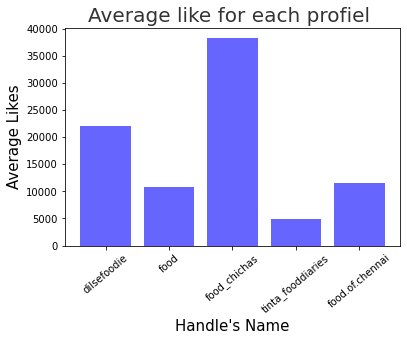

In [109]:
#Graph between proifiles and avergae likes
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='b',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 40)
plt.title('Average like for each profiel ',fontsize=20, color='black',alpha=0.8)
plt.show()

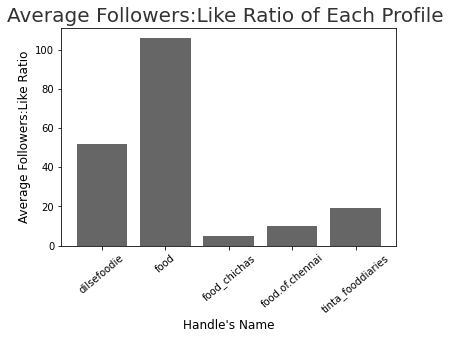

In [108]:
#Bar graph between profiles and their follower to like ratio
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='black',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 40 )
plt.title('Average Followers:Like Ratio of Each Profile ',fontsize=20, color='black',alpha=0.8)
plt.show()